In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [4]:
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.test.images.shape

(10000, 784)

In [6]:
mnist.validation.images.shape

(5000, 784)

In [7]:
train_x,train_y=mnist.train.next_batch(20000)

In [11]:
train_y#One_Hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [12]:
test_x,test_y=mnist.test.next_batch(5000)

### 图像的可视化

In [13]:
import matplotlib.pyplot as plt

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


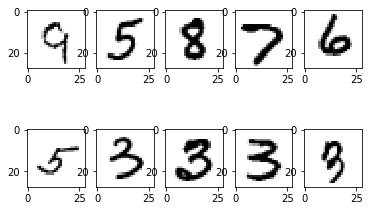

In [14]:
plt.rc('image',cmap='binary')
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28))
    print(train_y[i])
    
    

### 全连接神经网络

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
def model1():
    model=Sequential()
    model.add(Dense(784,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [21]:
m=model1()

In [22]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [36]:
history=m.fit(train_x,train_y,epochs=2,batch_size=32)

Epoch 1/2
20000/20000 [==============================] - 3s 152us/step - loss: 0.0310
Epoch 2/2
20000/20000 [==============================] - 3s 149us/step - loss: 0.0308


In [37]:
pred=m.predict(test_x)

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.952

In [41]:
from keras.layers import Conv2D,MaxPool2D,Flatten

当前的所有input是784*1的，如果使用卷积神经网络需要进行resize

In [43]:
X_train_img=train_x.reshape(train_x.shape[0],28,28,1)

In [44]:
X_test_img=test_x.reshape(test_x.shape[0],28,28,1)

In [47]:
def model2():
    model=Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
    model.add(MaxPool2D())
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    return model

In [48]:
m=model2()

In [49]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [53]:
history=m.fit(X_train_img,train_y,epochs=2,batch_size=32)

Epoch 1/2
20000/20000 [==============================] - 10s 522us/step - loss: 0.2597
Epoch 2/2
20000/20000 [==============================] - 13s 631us/step - loss: 0.0810


In [54]:
pred=m.predict(X_test_img)

In [55]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.977

### LeNet

In [57]:
import torch

In [58]:
torch.__version__

'0.4.1'

In [59]:
import torch.nn as nn

In [60]:
import torch.nn.functional as F

In [61]:
import torch.optim as optim

In [62]:
import torchvision

In [63]:
import torchvision.datasets as datasets

In [64]:
import torchvision.transforms as transforms

In [65]:
import os 
import random
import numpy as np 

#### 图像的Normalize

每个像素-mean/std

每个像素的归一化缩放

思考:

1.归一化哪部分数据？A训练集、B评测集、C训练集+评测集 -> C

2.归一化的参数mean和std来自于？A训练集、B评测集、C训练集+评测集 -> A

In [68]:
np.mean(mnist.train.images)

0.13070042

In [69]:
np.std(mnist.train.images)

0.3081594

#### 数据的归一化

In [141]:
data_trans=transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))#参数mean和std来自于训练集，但是transform本身在训练和评测的时候都会使用
])

In [142]:
train_data=datasets.MNIST('data',train=True,download=True,transform=data_trans)
test_data=datasets.MNIST('data',train=False,download=True,transform=data_trans)

In [143]:
n_train=int(len(train_data)*0.9)
n_validation=len(train_data)-n_train

In [144]:
train_data,valid_data=torch.utils.data.random_split(train_data,[n_train,n_validation])

In [145]:
len(train_data)

54000

In [146]:
len(valid_data)

6000

In [147]:
len(test_data)

10000

In [148]:
train_data.dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data
    Transforms (if any): Compose(
                             Resize(size=32, interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=(0.1307,), std=(0.3081,))
                         )
    Target Transforms (if any): None

In [149]:
batch_size=64

目前完成了数据集的制作

In [150]:
train_iterator=torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
valid_iterator=torch.utils.data.DataLoader(valid_data,batch_size=batch_size)
test_iterator=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

In [151]:
len(train_iterator)

844

#### 构建神经网络

In [177]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        #第一层conv1，因为是MNIST数据集，所有channel数是1，输出的channel是6,kernel_size是5*5
        self.conv1=nn.Conv2d(1,6,5)
        #第二层conv2,输入channel=6,输出channel=16，kernel5*5,input_size=14*14,output_size=10*10
        self.conv2=nn.Conv2d(6,16,5)
        
        self.fc1=nn.Linear(16*5*5,120)
        
        self.fc2=nn.Linear(120,84)
        
        self.fc3=nn.Linear(84,10)#不用增加softmax层，从推断的角度直接使用argmax就可以得到最终的预测结果，在cross_entropy函数中实现了softmax的功能
        
    def forward(self,x):#规定计算图架构
        out=F.max_pool2d(F.relu(self.conv1(x)),2)
        out=F.max_pool2d(F.relu(self.conv2(out)),2)
        out=out.view(out.shape[0],-1)
        out=F.relu(self.fc1(out))
        out=F.relu(self.fc2(out))
        out=self.fc3(out)
        return out
        

#### 载入模型并进行计算

In [178]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [179]:
model_dir='models'

if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

In [180]:
model=LeNet().to(device)#将神经网络对象加载到相应的内存或显存中

In [181]:
model_path=os.path.join(model_dir,'lenet_mnist.pt')#保存训练好的模型的位置

In [182]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [183]:
optimizer=optim.Adam(model.parameters())

In [184]:
criterion=nn.CrossEntropyLoss()

In [185]:
#criterion

In [186]:
def accu(fx,y):
    pred=fx.max(1,keepdim=True)[1]
    correct=pred.eq(y.view_as(pred)).sum()
    acc=correct.float()/pred.shape[0]
    return acc

In [192]:
#训练一个epoch
def train(model,device,iterator,optimizer,criterion):
    epoch_loss=0#积累变量
    epoch_acc=0#积累变量
    model.train()#该函数表示PHASE=Train,自动求导以及求导运算将会被激活
    
    for (x,y) in iterator:#拿每一个minibatch
#         print(x,y)
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()#将所有的梯度变量清零
        fx=model(x)#进行inference
        loss=criterion(fx,y)#计算train_loss
        acc=accu(fx,y)#计算train_acc
        loss.backward()#进行bp回算各参数和神经元的梯度
        optimizer.step()#统一进行梯度下降的更新
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
    
    #返回平均训练Loss和平均训练Accu
    return epoch_loss/len(iterator),epoch_acc/len(iterator)


In [193]:
#评测一个验证集，不用梯度下降，只是进行推断和误差计算
def evaluate(model,device,iterator,criterion):
    epoch_loss=0
    epoch_acc=0
    model.eval()#PHASE=Eval,不会增加梯度的存储变量和计算单元
    with torch.no_grad():
        for (x,y) in iterator:
            x=x.to(device)
            y=y.to(device)
            fx=model(x)
            loss=criterion(fx,y)
            acc=accu(fx,y)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
            
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

#### 开始训练

In [194]:
epochs=10

In [195]:
best_valid_loss=float('inf')#自动筛选最优模型并保存

In [ ]:
for epoch in range(epochs):
    train_loss,train_acc=train(model,device,train_iterator,optimizer,criterion)
    valid_loss,valid_acc=evaluate(model,device,valid_iterator,criterion)
    if valid_loss<best_valid_loss:#当前模型好于历史最好模型
        best_valid_loss=valid_loss
        torch.save(model.state_dict(),model_path)#模型文件的更新
    print('Epoch:{0}|Train Loss:{1}|Train Acc:{2}|Val Loss:{3}|Val Acc:{4}'.format(epoch+1,train_loss,train_acc,valid_loss,valid_acc))

Epoch:1|Train Loss:0.0266898773517901|Train Acc:0.9912618483412322|Val Loss:0.042157018425140004|Val Acc:0.9876994680851063
Epoch:2|Train Loss:0.023265801414972066|Train Acc:0.992391143364929|Val Loss:0.04200601065206277|Val Acc:0.987533244680851
Epoch:3|Train Loss:0.019364272754074416|Train Acc:0.9937919628987381|Val Loss:0.04667131786381434|Val Acc:0.9873670212765957
Epoch:4|Train Loss:0.01695843954996528|Train Acc:0.9943905509478673|Val Loss:0.04073276849645636|Val Acc:0.9878656914893617
Epoch:5|Train Loss:0.013955614088906358|Train Acc:0.9954457938388626|Val Loss:0.05334185337291119|Val Acc:0.9867021276595744
Epoch:6|Train Loss:0.014754624299371783|Train Acc:0.9951866113744076|Val Loss:0.037643225546529956|Val Acc:0.9901928191489362
Epoch:7|Train Loss:0.011473359045753547|Train Acc:0.996149289099526|Val Loss:0.04160339607861193|Val Acc:0.9895279255319149
Epoch:8|Train Loss:0.01147592620332659|Train Acc:0.996032039912956|Val Loss:0.045265191042686795|Val Acc:0.9893617021276596


In [ ]:
model.load_state_dict(torch.load(model_path))#load最好结果到model

In [ ]:
test_loss,test_acc=evaluate(model,device,test_iterator,criterion)
print('Test Loss:{0}|Test Acc:{1}'.format(test_loss,test_acc))